In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('C:/Users/DELL/Downloads/top_5000_influencers.csv')
data

,acount_name,user_name,posts,followers,following,taux_engagement,Topic,profile_desc,image
0,@cristiano,cristiano ronaldo,3503,590270342.0,563,0.91%,Health Style Fashion Music Travel Art Photogra...,Join my NFT journey on @Binance. Click the lin...,https://cdn1.picuki.com/hosted-by-instagram/q/...
1,@leomessi,leo messi,1043,473301474.0,281,1.69%,LifeStyle Family Competition Art Food Fashion ...,Bienvenidos a la cuenta oficial de Instagram d...,https://cdn1.picuki.com/hosted-by-instagram/q/...
2,@selenagomez,selena gomez,1894,422392150.0,250,2.54%,LifeStyle Family Competition Art Food Fashion ...,"By grace, through faith. Founder @rarebeauty F...",https://cdn1.picuki.com/hosted-by-instagram/q/...
3,@kyliejenner,kylie,6833,394392699.0,87,0.69%,LifeStyle Family Competition Art Food Fashion ...,@kyliecosmetics @kylieskin @kylieswim @kyliebaby,https://cdn1.picuki.com/hosted-by-instagram/q/...
4,@therock,dwayne johnson,7311,384404187.0,694,0.13%,LifeStyle Family Competition Art Food Fashion ...,founder,https://cdn1.picuki.com/hosted-by-instagram/q/...
...,...,...,...,...,...,...,...,...,...
4995,@sos_janibekyan_,սոս ջանիբեկյան,99,255.0,45,13.73%,Fashion Beauty Health Sports Music Dance Fitne...,Actor🎭 Admin 👨‍💼👩‍💼 Best Fan Page @sosjanibeky...,https://cdn1.picuki.com/hosted-by-instagram/q/...
4996,@wonderfuldixe,explore | adventure | travel,68,165.0,242,4.34%,Health Style Fashion Music Travel Art Photogra...,🌏IPhotographer Nature is the art of God.❣️,https://cdn1.picuki.com/hosted-by-instagram/q/...
4997,@double.adventures,double adventure | travel|,16,65.0,244,55.38%,Health Style Fashion Music Travel Art Photogra...,🌴A small community of travel lovers! 🌺 Inspiri...,https://cdn1.picuki.com/hosted-by-instagram/q/...
4998,@_nikosayag_,nikosayagı,16,41.0,29,34.76%,Art Food LifeStyle Religion Entertainment,@nikosayağı fan sayfasıı ❤❤❤,https://cdn1.picuki.com/hosted-by-instagram/q/...


In [4]:
data.columns

Index(['acount_name', 'user_name', 'posts', 'followers', 'following',
       'taux_engagement', 'Topic', 'profile_desc', 'image'],
      dtype='object')

In [5]:
data.describe()

,posts,followers,following
count,5000.000000,5.000000e+03,5000.000000
mean,1980.231200,3.981013e+06,1184.448400
std,4815.555252,2.155322e+07,3682.002828
min,1.000000,3.900000e+01,0.000000
25%,249.000000,1.056075e+05,257.750000
50%,763.500000,3.430125e+05,661.000000
75%,1996.250000,2.073762e+06,1345.000000
max,101864.000000,5.902703e+08,240934.000000


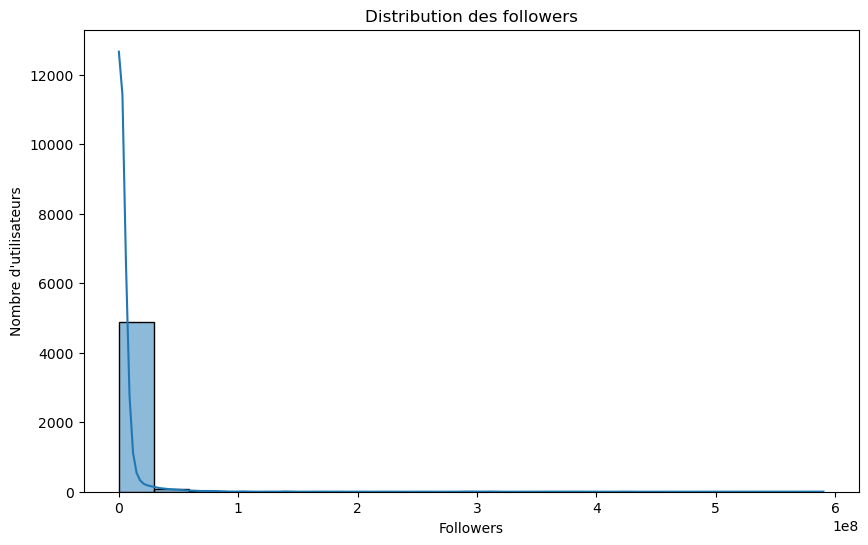

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme des followers
plt.figure(figsize=(10, 6))
sns.histplot(data['followers'], bins=20, kde=True)
plt.title('Distribution des followers')
plt.xlabel('Followers')
plt.ylabel('Nombre d\'utilisateurs')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2796\253133811.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


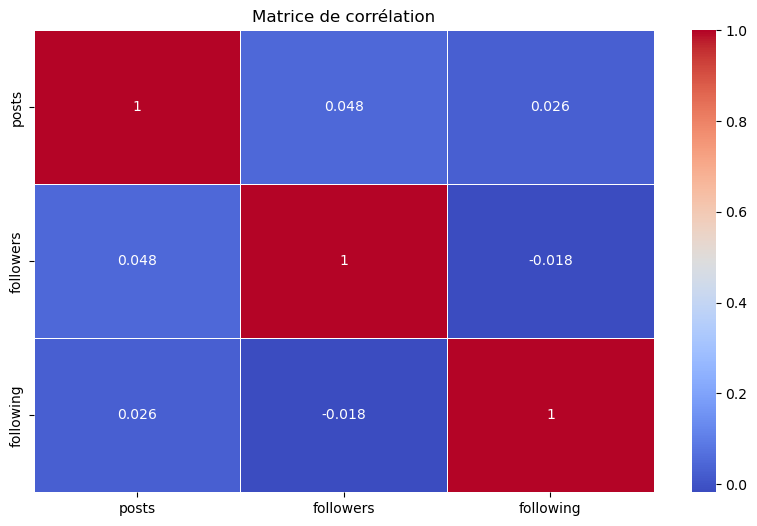

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de corrélation')
plt.show()


In [8]:
missing_values = data.isnull().sum()
missing_values

acount_name         0
user_name          46
posts               0
followers           0
following           0
taux_engagement     0
Topic               0
profile_desc        0
image               0
dtype: int64

In [9]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Téléchargez les stopwords si nécessaire
# import nltk
# nltk.download('stopwords')

# Tokenization et comptage des mots
stop_words = set(stopwords.words('english'))  # Utilisez la langue appropriée
desc_tokens = [word.lower() for desc in data['Topic'] for word in word_tokenize(desc)]
filtered_tokens = [word for word in desc_tokens if word.isalnum() and word not in stop_words]

word_counts = Counter(filtered_tokens)
common_words = word_counts.most_common(100)

common_words


[('sports', 3769),
 ('music', 3632),
 ('fashion', 3574),
 ('entertainment', 3163),
 ('family', 3149),
 ('art', 3102),
 ('food', 3078),
 ('travel', 2950),
 ('beauty', 2724),
 ('lifestyle', 2267),
 ('health', 1952),
 ('socialmedia', 1763),
 ('culture', 1664),
 ('photography', 1625),
 ('education', 1520),
 ('events', 1336),
 ('dance', 1313),
 ('business', 1192),
 ('tourism', 1158),
 ('technology', 1127),
 ('celebrations', 953),
 ('fitness', 876),
 ('style', 850),
 ('creativity', 817),
 ('nature', 790),
 ('cinema', 759),
 ('religion', 749),
 ('pets', 739),
 ('leisure', 623),
 ('comedy', 540),
 ('influencers', 403),
 ('entrepreneurship', 403),
 ('competition', 400),
 ('finance', 237),
 ('onlinecontent', 237),
 ('cuisine', 216),
 ('animals', 216)]

In [10]:
# Supposons également que 'taux engagement' est le nom de la colonne
data['taux_engagement'] = data['taux_engagement'].str.replace('%', '').astype(float) / 100.0

In [11]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [12]:
# Créez un MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalisez les colonnes numériques
data['posts'] = minmax_scaler.fit_transform(data[['posts']])
data['followers'] = minmax_scaler.fit_transform(data[['followers']])
data['following'] = minmax_scaler.fit_transform(data[['following']])
data['taux_engagement'] = minmax_scaler.fit_transform(data[['taux_engagement']])


In [13]:

# Transformer la colonne 'Topic' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
topic_vectors = tfidf_vectorizer.fit_transform(data['Topic'])


In [14]:

# Concaténez les colonnes pour créer la matrice de données utilisateur
user_data_matrix = pd.concat([
    pd.DataFrame(data['followers']),
    pd.DataFrame(data['following']),
    pd.DataFrame(data['posts']),
    pd.DataFrame(data['taux_engagement']),
    pd.DataFrame(topic_vectors.toarray())
], axis=1)


In [15]:
# Calculer la similarité cosinus entre les profils
cosine_sim_matrix = cosine_similarity(user_data_matrix, user_data_matrix)


In [16]:

# génération de paires similaires et non similaires
similar_pairs = []
dissimilar_pairs = []

# Génération de paires similaires
for _ in range(500):  # Vous pouvez ajuster le nombre de paires similaires souhaitées
    user_a = random.choice(user_data_matrix.index)
    # Choisissez un autre utilisateur similaire à user_a (utilisez votre mesure de similarité)
    similar_user_b = np.argmax(cosine_sim_matrix[user_data_matrix.index == user_a])
    similar_pairs.append((user_a, similar_user_b))

# Génération de paires non similaires
for _ in range(500):  # Vous pouvez ajuster le nombre de paires non similaires souhaitées
    user_a = random.choice(user_data_matrix.index)
    user_b = random.choice(user_data_matrix.index)
    seuil_similarite = 0.5  # Définissez ici le seuil de similarité approprié
    while user_b == user_a or cosine_sim_matrix[user_data_matrix.index == user_a, user_data_matrix.index == user_b] > seuil_similarite:
        user_b = random.choice(user_data_matrix.index)
    dissimilar_pairs.append((user_a, user_b))


In [23]:

# Diviser les données en ensembles d'entraînement et de test
train_indices, test_indices = train_test_split(range(len(data)), test_size=0.2, random_state=42)

# Créer un modèle de réseau de neurones siamois
def create_siamese_network(input_shape):
    input_layer = Input(shape=input_shape)
    shared_network = Dense(128, activation='relu')(input_layer)
    shared_network = Dense(64, activation='relu')(shared_network)
    shared_network = Dense(32, activation='relu')(shared_network)
    shared_network = Dense(16, activation='relu')(shared_network)
    encoded_input = shared_network
    return Model(input_layer, encoded_input)

# Créer les deux branches du réseau siamois
input_shape = (user_data_matrix.shape[1],)  # Dimension de l'entrée (basée sur les caractéristiques)
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

siamese_network = create_siamese_network(input_shape)
encoded_a = siamese_network(input_a)
encoded_b = siamese_network(input_b)

# Mesurer la similarité entre les deux vecteurs encodés
distance_layer = Lambda(lambda x: tf.abs(x[0] - x[1]))
distance = distance_layer([encoded_a, encoded_b])

# Créer le modèle final
siamese_model = Model(inputs=[input_a, input_b], outputs=distance)

# Définir la fonction de perte contrastive
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

# Compiler le modèle avec la fonction de perte contrastive et l'accuracy
siamese_model.compile(loss=contrastive_loss, optimizer=Adam(learning_rate=0.001))

siamese_model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 41)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 41)]         0           []                               
                                                                                                  
 model_4 (Functional)           (None, 16)           16240       ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 16)           0           ['model_4[0][0]',          

In [24]:

# Préparer les données d'entraînement
# Créez une liste d'indices de paires similaires et non similaires pour l'entraînement
train_indices_similar = [(i, j) for i, j in similar_pairs if i in train_indices and j in train_indices]
train_indices_dissimilar = [(i, j) for i, j in dissimilar_pairs if i in train_indices and j in train_indices]

# Mélangez les indices similaires et non similaires
random.shuffle(train_indices_similar)
random.shuffle(train_indices_dissimilar)

# Organiser les données d'entraînement pour le modèle siamois
X_train_similar_a = np.array([user_data_matrix.values[i] for i, j in train_indices_similar])
X_train_similar_b = np.array([user_data_matrix.values[j] for i, j in train_indices_similar])
X_train_dissimilar_a = np.array([user_data_matrix.values[i] for i, j in train_indices_dissimilar])
X_train_dissimilar_b = np.array([user_data_matrix.values[j] for i, j in train_indices_dissimilar])

# Organiser les étiquettes d'entraînement (1 pour les paires similaires, 0 pour les paires non similaires)
y_train_similar = np.ones(len(train_indices_similar))
y_train_dissimilar = np.zeros(len(train_indices_dissimilar))

# Combiner les données et les étiquettes similaires et non similaires
X_train_a = np.concatenate((X_train_similar_a, X_train_dissimilar_a), axis=0)
X_train_b = np.concatenate((X_train_similar_b, X_train_dissimilar_b), axis=0)
y_train = np.concatenate((y_train_similar, y_train_dissimilar), axis=0)


In [25]:
# Entraîner le modèle
batch_size = 32
siamese_model.fit(
    [X_train_a, X_train_b],
    y_train,
    epochs=20,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/20
19/19 [==============================] - 1s 11ms/step - loss: 0.2751 - val_loss: 0.7866
Epoch 2/20
19/19 [==============================] - 0s 3ms/step - loss: 0.2040 - val_loss: 0.5522
Epoch 3/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1334 - val_loss: 0.3710
Epoch 4/20
19/19 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 0.2749
Epoch 5/20
19/19 [==============================] - 0s 4ms/step - loss: 0.0691 - val_loss: 0.2322
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 0.0599 - val_loss: 0.2075
Epoch 7/20
19/19 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.1905
Epoch 8/20
19/19 [==============================] - 0s 4ms/step - loss: 0.0490 - val_loss: 0.1803
Epoch 9/20
19/19 [==============================] - 0s 4ms/step - loss: 0.0471 - val_loss: 0.1697
Epoch 10/20
19/19 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.1653
Epoch 11/20
19/19 

In [19]:
from keras.utils import custom_object_scope
# Enregistrez votre modèle avec la fonction de perte personnalisée dans la portée
with custom_object_scope({'contrastive_loss': contrastive_loss}):
    siamese_model.save('C:/Users/DELL/Desktop/Modele1/siamese_model_new.h5')


In [20]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


2.12.0
2.12.0


In [ ]:

# Supposons que "user_to_recommend" soit l'indice de l'utilisateur que vous souhaitez recommander
user_to_recommend =0 # Par exemple, pour l'utilisateur numéro 0

# Utilisez le modèle pour calculer les scores de similarité avec tous les autres utilisateurs
similarity_scores = []  # Stocke les scores de similarité

# Parcourez tous les utilisateurs (indices) sauf l'utilisateur à recommander
for i in range(len(user_data_matrix)):
    if i != user_to_recommend:
        # Utilisez les vecteurs encodés de l'utilisateur à recommander et de l'utilisateur actuel
        distance_scores = siamese_model.predict([user_data_matrix.values[user_to_recommend].reshape(1, -1), user_data_matrix.values[i].reshape(1, -1)])
        # Extrayez la valeur scalaire à partir du tableau numpy
        distance_score = distance_scores[0][0]  # Ici, nous prenons le premier élément du premier tableau
        similarity_scores.append((i, distance_score))

# Triez les utilisateurs en fonction de leurs scores de similarité (du plus similaire au moins similaire)
similarity_scores.sort(key=lambda x: x[1])

# Obtenez les indices des utilisateurs recommandés
recommended_user_indices = [i for i, _ in similarity_scores]

# Recommandez les 10 meilleurs utilisateurs similaires (en utilisant les noms d'utilisateurs)
user_names =data['acount_name'] # Remplacez [...] par votre liste de noms d'utilisateurs
top_10_recommended_users = [user_names[i] for i in recommended_user_indices[:10]]
# Recommandez les 10 meilleurs utilisateurs similaires
top_10_recommended_user = recommended_user_indices[:10]

print("Utilisateurs recommandés (indices) :")
print(top_10_recommended_user)
print("Utilisateurs recommandés :")
print(top_10_recommended_users)


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


In [ ]:
# Supposons que vous ayez une liste de noms d'utilisateurs appelée user_names
user_names = data['acount_name'].tolist()  # Assurez-vous que cette liste est correctement définie

# Fonction pour rechercher l'indice d'un utilisateur par son nom d'utilisateur
def find_user_index(username, user_names):
    try:
        user_index = user_names.index(username)
        return user_index
    except ValueError:
        print(f"L'utilisateur avec le nom d'utilisateur '{username}' n'a pas été trouvé.")
        return None

# Nom d'utilisateur que vous souhaitez rechercher
username_to_find = "@dorra_zarrouk"

# Trouvez l'indice de l'utilisateur à recommander
user_to_recommend = find_user_index(username_to_find, user_names)

if user_to_recommend is not None:
    # Utilisez le modèle pour calculer les scores de similarité avec tous les autres utilisateurs
    similarity_scores = []  # Stocke les scores de similarité

    # Parcourez tous les utilisateurs (indices) sauf l'utilisateur à recommander
    for i in range(len(user_data_matrix)):
        if i != user_to_recommend:
            # Utilisez les vecteurs encodés de l'utilisateur à recommander et de l'utilisateur actuel
            distance_scores = siamese_model.predict([user_data_matrix.values[user_to_recommend].reshape(1, -1), user_data_matrix.values[i].reshape(1, -1)])
            # Extrayez la valeur scalaire à partir du tableau numpy
            distance_score = distance_scores[0][0]  # Ici, nous prenons le premier élément du premier tableau
            similarity_scores.append((i, distance_score))

    # Triez les utilisateurs en fonction de leurs scores de similarité (du plus similaire au moins similaire)
    similarity_scores.sort(key=lambda x: x[1])

    # Obtenez les indices des utilisateurs recommandés
    recommended_user_indices = [i for i, _ in similarity_scores]

    # Recommandez les 10 meilleurs utilisateurs similaires (en utilisant les noms d'utilisateurs)
    top_10_recommended_users = [user_names[i] for i in recommended_user_indices[:10]]

    print("Utilisateurs recommandés (indices) :")
    print(recommended_user_indices[:10])
    print("Utilisateurs recommandés :")
    print(top_10_recommended_users)
else:
    # Gérez le cas où l'utilisateur n'a pas été trouvé
    pass


In [26]:
from sklearn.metrics import f1_score

# Créer des étiquettes pour les prédictions
y_true_similar = np.ones(len(predictions_similar))
y_true_dissimilar = np.zeros(len(predictions_dissimilar))

# Combiner les étiquettes similaires et non similaires
y_true = np.concatenate((y_true_similar, y_true_dissimilar), axis=0)

# Combiner les prédictions similaires et non similaires
y_pred = np.concatenate((predictions_similar, predictions_dissimilar), axis=0)

# Appliquer un seuil pour convertir les scores de similarité en prédictions binaires
threshold = 0.5 
y_pred_binary = (y_pred > threshold).astype(int)

# Calculer le F1-score
f1 = f1_score(y_true, y_pred_binary)

print("F1 score(weighted): {f1}")


NameError: name 'predictions_similar' is not defined